# Getting GAIA stars around a target star

https://astroquery.readthedocs.io/en/latest/gaia/gaia.html 

In [5]:
from astropy.coordinates import Angle

from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

star_ra  = Angle("8h15m23.41s")
star_dec = Angle("-38d59m23.4s")
radius = u.Quantity(400, u.arcsec)

print('star is at {} {}'.format(star_ra.degree, star_dec.degree))

coord = SkyCoord(ra=star_ra.degree, dec=star_dec.degree, unit=(u.degree, u.degree), frame='icrs')

star is at 123.84754166666664 -38.98983333333334


In [12]:
Gaia.MAIN_GAIA_TABLE = "gaiaedr3.gaia_source" # Select early Data Release 3
Gaia.ROW_LIMIT = 80000
j = Gaia.cone_search_async(coord, radius)


INFO: Query finished. [astroquery.utils.tap.core]


In [13]:
r = j.get_results()
r.pprint()

    solution_id             designation          ...          dist         
                                                 ...                       
------------------- ---------------------------- ... ----------------------
1635721458409799680 Gaia DR2 5539970601632026752 ... 0.00040976969754023167
1635721458409799680 Gaia DR2 5539970597334497024 ...  0.0014120313739027625
1635721458409799680 Gaia DR2 5539970597334497280 ...   0.002073330444822029
1635721458409799680 Gaia DR2 5539970601632027264 ...  0.0032578523783321437
1635721458409799680 Gaia DR2 5539970666052457856 ...   0.004947014974293907
1635721458409799680 Gaia DR2 5539970601632030208 ...    0.00807016450901266
1635721458409799680 Gaia DR2 5539972074801731456 ...    0.00851463212613551
1635721458409799680 Gaia DR2 5539972079098671616 ...   0.008684166152267478
1635721458409799680 Gaia DR2 5539972074803247616 ...   0.009270429694844597
1635721458409799680 Gaia DR2 5539970601628590208 ...    0.00945086458868157
            

In [14]:
r

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,
int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64
1635721458409799680,Gaia DR2 5539970601632026752,5539970601632026752,1683136744,2015.5,123.84702812628771,0.013789527233899384,-38.98977516121575,0.01422880019026927,1.7281038832094247,0.0177289582085643,97.47352,-9.753877542724986,0.02898979971215618,7.343200615667013,0.02792721652061782,0.06500024,-0.17085956,-0.24116898,-0.004675992,0.26239553,0.02645566,-0.15293187,0.17859578,-0.09521565,0.08756163,236,0,236,0,-4.6845016,143.74515,0.0,0.0,31,False,105.95779,1.609989770236654,0.0038742704087892806,-0.019179007,27,16,0.03722054,0,29,False,254,83682.20461791744,39.482805766139975,2119.4595,13.381783,28,45070.581885785316,116.76986431352246,385.97784,13.716656,28,56055.52963643909,79.45475627639881,705.5025,12.890374,1.2084543,0,0.82628155,0.3348732,0.49140835,--,--,0,--,--,--,NOT_AVAILABLE,256.3589881759861,-2.242886706980212,141.69216727100593,-56.516180401652676,100001,5816.3335,5797.6665,5902.0,0.0857,0.017,0.195,0.047,0.0079,0.1007,200111,1.0347958,1.004974,1.04147,1.1040817,1.0720708,1.1360927,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+5539970601632026752,0.00040976969754023167
1635721458409799680,Gaia DR2 5539970597334497024,5539970597334497024,1143415042,2015.5,123.84577119051367,0.05427346570628281,-38.99013055477085,0.05355766341352682,1.531955709

<IPython.core.display.Javascript object>


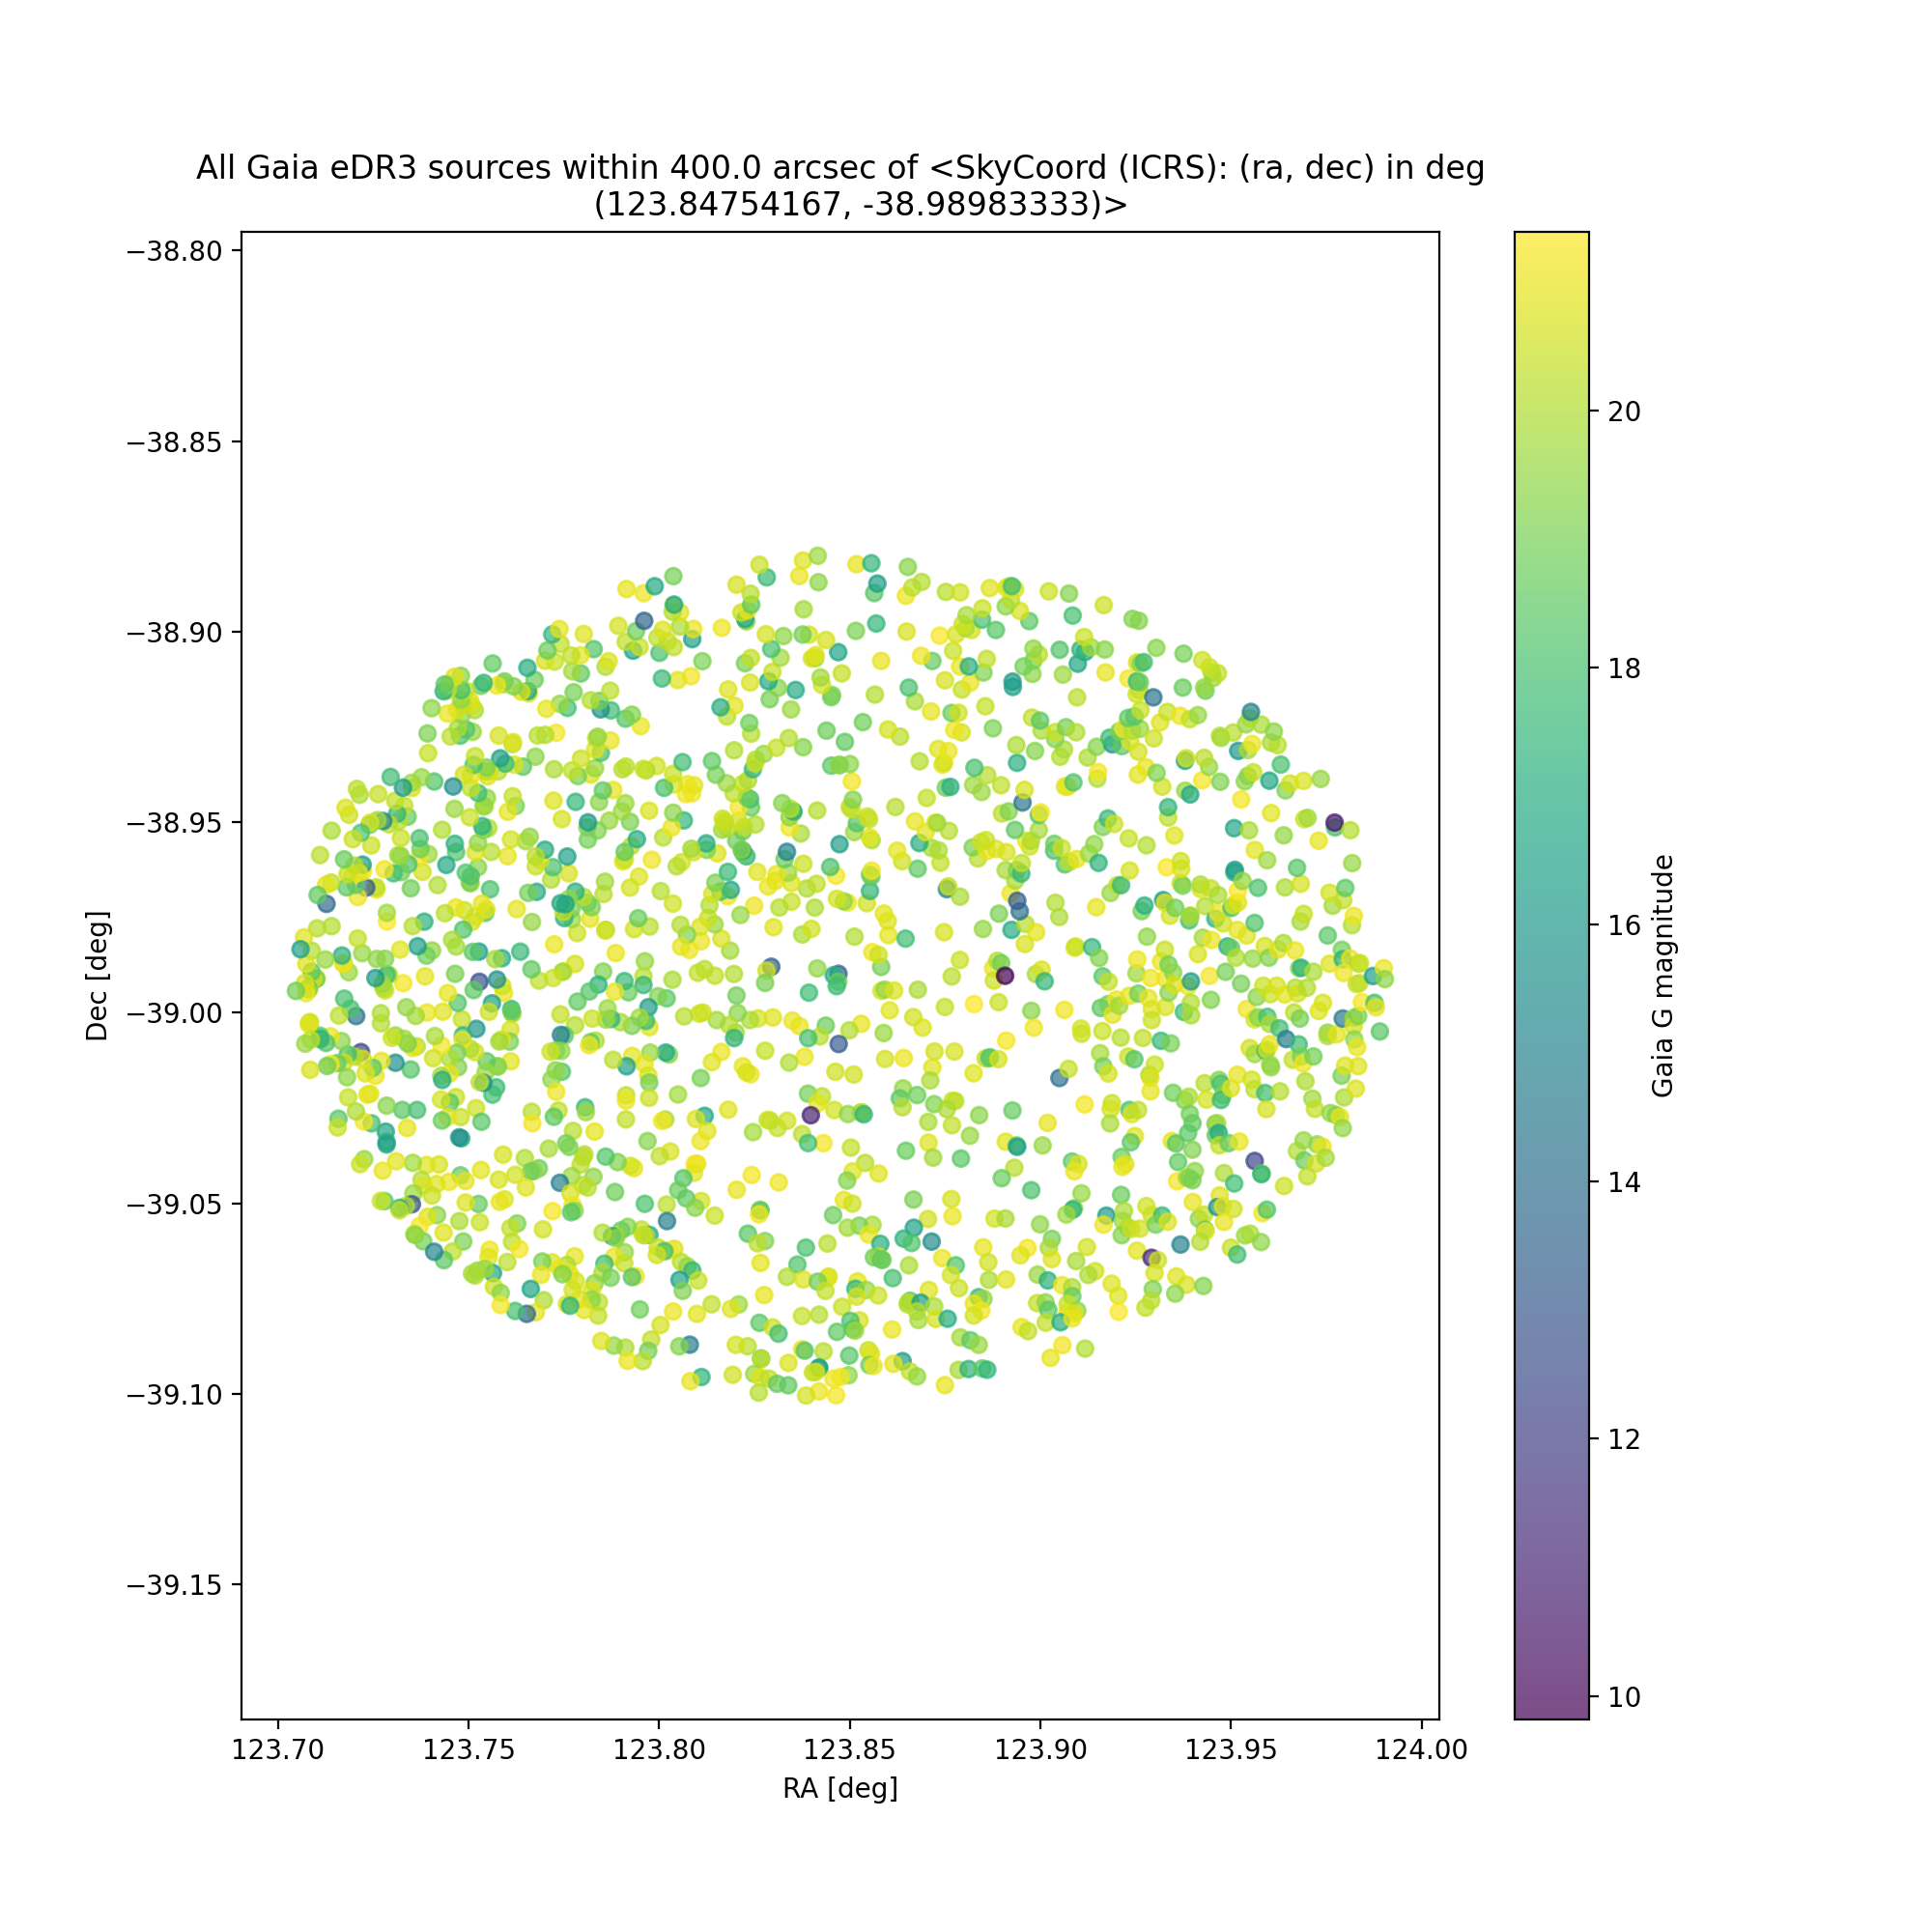

Text(0.5, 1.0, 'All Gaia eDR3 sources within 400.0 arcsec of <SkyCoord (ICRS): (ra, dec) in deg\n    (123.84754167, -38.98983333)>')

In [42]:
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib import cm

fi, ax = plt.subplots(1,1,figsize=(10,10))
ax.axis('equal')

sc = ax.scatter(r['ra'],r['dec'],c=r['phot_g_mean_mag'],alpha=0.7,cmap=plt.get_cmap('viridis'))

ax.set_xlabel('RA [deg]')
ax.set_ylabel('Dec [deg]')

cbar = plt.colorbar(sc)
cbar.set_label('Gaia G magnitude')
ax.set_title('All Gaia eDR3 sources within {} of {}'.format(radius,coord))



In [47]:
g_limit = 17.0 # set minimum g band magnitude
r_mag = r[(r['phot_g_mean_mag']<g_limit)]
print(len(r))
print(len(r_mag))

1704
108


<IPython.core.display.Javascript object>


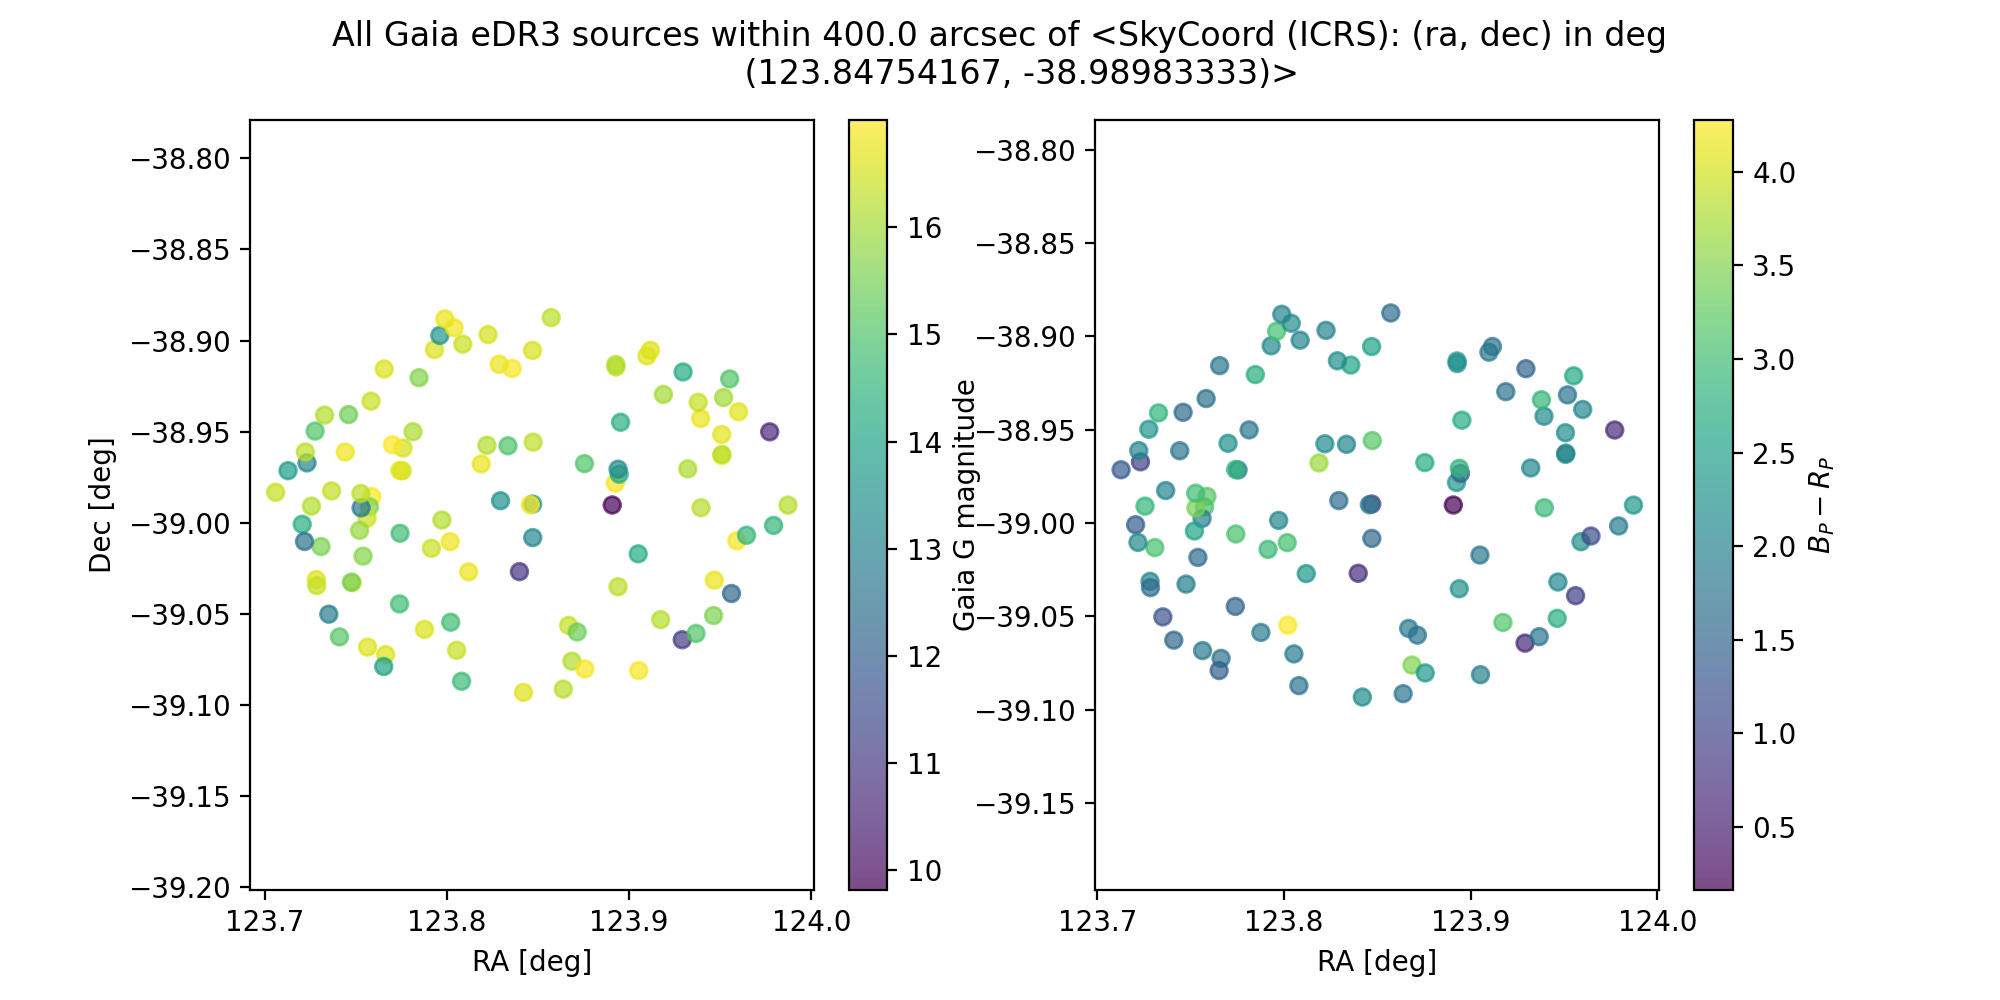

In [61]:

fi, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

sc = ax1.scatter(r_mag['ra'],r_mag['dec'],c=r_mag['phot_g_mean_mag'],alpha=0.7,cmap=plt.get_cmap('viridis'))
ax1.axis('equal')

ax1.set_xlabel('RA [deg]')
ax1.set_ylabel('Dec [deg]')

cbar = plt.colorbar(sc,ax=ax1)
cbar.set_label('Gaia G magnitude')


sc2 = ax2.scatter(r_mag['ra'],r_mag['dec'],c=r_mag['bp_rp'],alpha=0.7,cmap=plt.get_cmap('viridis'))
ax2.axis('equal')

ax2.set_xlabel('RA [deg]')
#ax2.set_ylabel('Dec [deg]')
fi.suptitle('All Gaia eDR3 sources within {} of {}'.format(radius,coord))

cbar = plt.colorbar(sc2,ax=ax2)
cbar.set_label('$B_P - R_P$')

In [67]:
r_mag.write('gaia_stars.ecsv', format="ascii.ecsv", overwrite=True)  

In [64]:
r_mag

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,dist
,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,
int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,float64
1635721458409799680,Gaia DR2 5539970601632026752,5539970601632026752,1683136744,2015.5,123.84702812628771,0.013789527233899384,-38.98977516121575,0.01422880019026927,1.7281038832094247,0.0177289582085643,97.47352,-9.753877542724986,0.02898979971215618,7.343200615667013,0.02792721652061782,0.06500024,-0.17085956,-0.24116898,-0.004675992,0.26239553,0.02645566,-0.15293187,0.17859578,-0.09521565,0.08756163,236,0,236,0,-4.6845016,143.74515,0.0,0.0,31,False,105.95779,1.609989770236654,0.0038742704087892806,-0.019179007,27,16,0.03722054,0,29,False,254,83682.20461791744,39.482805766139975,2119.4595,13.381783,28,45070.581885785316,116.76986431352246,385.97784,13.716656,28,56055.52963643909,79.45475627639881,705.5025,12.890374,1.2084543,0,0.82628155,0.3348732,0.49140835,--,--,0,--,--,--,NOT_AVAILABLE,256.3589881759861,-2.242886706980212,141.69216727100593,-56.516180401652676,100001,5816.3335,5797.6665,5902.0,0.0857,0.017,0.195,0.047,0.0079,0.1007,200111,1.0347958,1.004974,1.04147,1.1040817,1.0720708,1.1360927,https://gea.esac.esa.int/data-server/datalink/links?ID=Gaia+DR2+5539970601632026752,0.00040976969754023167
1635721458409799680,Gaia DR2 5539970597334497024,5539970597334497024,1143415042,2015.5,123.84577119051367,0.05427346570628281,-38.99013055477085,0.05355766341352682,1.531955709